In [2]:
import pandas as pd


In [4]:
df =pd.read_csv("../Datasets/winequality-red.csv")

# mapping dict that maps the quality values from 0 to 5

quality_mapping = {
    3:0,
    4:1,
    5:2,
    6:3,
    7:4,
    8:5
}

df['quality'] = df['quality'].map(quality_mapping)

In [7]:
# Train Test Split

# Shuffle the df by using sample function with fraction 1
# Reset the indices as they change after shuffling the df

df = df.sample(frac=1).reset_index(drop=True)

# Top 1000 as train and bottom 599 as test

df_train = df.head(1000)
df_test = df.tail(599)


In [8]:
# Import scikit-learn 

from sklearn import tree
from sklearn import metrics

#Import Plotting

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Plot size

matplotlib.rc('xtick',labelsize=20)
matplotlib.rc('ytick',labelsize=20)

%matplotlib inline

In [13]:
# Initialize accuracies
train_accuracies = [0.5]
test_accuracies = [0.5]

cols = df.columns[:-1]


# Iterate over a few dept values

for depth in range(1,25):
    #Initialize model
    clf = tree.DecisionTreeClassifier(max_depth=depth)

    # fit the model
    clf.fit(df_train[cols],df_train.quality)

    #Train and Test Predictions
    train_predictions = clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])

    # Calculate Train and test accuracies
    train_accuracy = metrics.accuracy_score(df_train.quality,train_predictions)
    test_accuracy = metrics.accuracy_score(df_test.quality,test_predictions)

    # Append Accuracies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)



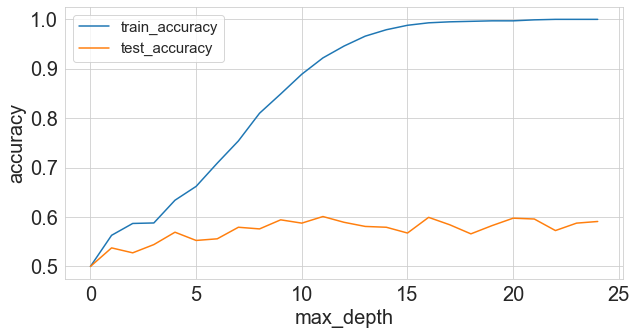

In [14]:
# Plots

plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
plt.plot(train_accuracies,label="train_accuracy")
plt.plot(test_accuracies,label="test_accuracy")
plt.legend(loc="upper left",prop = {'size':15})
plt.xticks(range(0,26,5))
plt.xlabel("max_depth",size=20)
plt.ylabel("accuracy",size=20)
plt.show()